In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# part 1


In [4]:
#define image1 here
image1 = np.array([[141, 0 ,138, 143,143,143,144],[141,140,140,142,142,143,143],[140,145,145,144,142,142,145],[141,141,141,143,142,141,143],[139,140,141,141,142,143,144]])

In [5]:
#code here
#first define a function for calculating histogram
#you are free to use libraries
def calc_hist(image):
    '''
    you are free to use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    hist = np.zeros(256 , dtype=int)
    for row in image:
      for element in row:
        hist[element] += 1
    return hist

Text(0.5, 1.0, 'histogram')

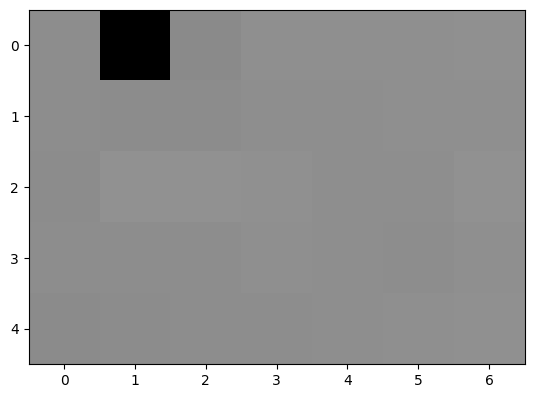

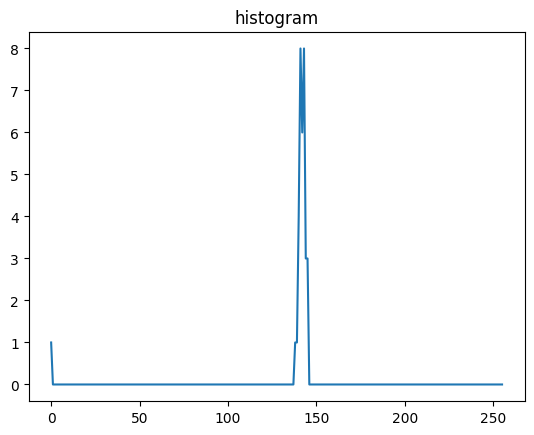

In [6]:
#dont change this cell
plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(image1))
plt.title('histogram')

In [26]:
#code here
#define a function (stretch) for stretching(input:image , output: stretched image)

def stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  output_image = image.copy()
  # Start
  max = np.amax(image)
  min = np.amin(image)
  for row in range(len(image)):
    for element in range(len(image[row])):
      output_image[row][element] = ((image[row][element] - min) / (max - min)) * 255
  # End
  return output_image


Text(0.5, 1.0, 'stretched histogram')

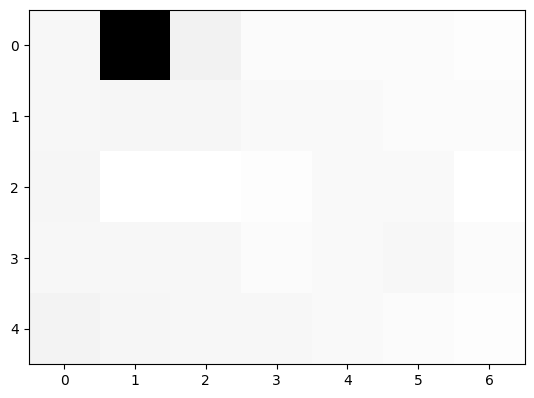

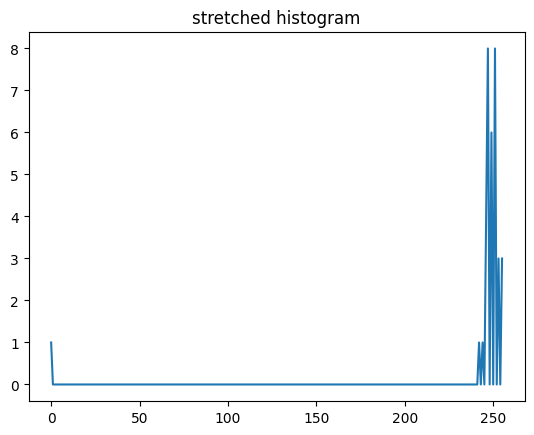

In [27]:
#dont change this cell
plt.imshow(stretch_hist(image1),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1)))
plt.title('stretched histogram')

In [34]:
#code here
#define a function (Clip) for Clipping(input:image , output: Clipped image)

def clip_hist(image, min_value, max_value):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
    min_value : min value of the histogram which you wanna clip.
    max_value : max value of the histogram which you wanna clip.
  output(s):
    output_image (ndarray): enhanced image with histogram clipping
  '''
  output_image = image.copy()
  # Start
  for row in range(len(image)):
    for element in range(len(image[row])):
      output_image[row][element] = ((image[row][element] - min_value) / (max_value - min_value)) * 255
  output_image = np.where(output_image > 0 , output_image , 0)
  output_image = np.where(output_image < 255 , output_image , 255)
  # End
  return output_image


Text(0.5, 1.0, 'clipped histogram')

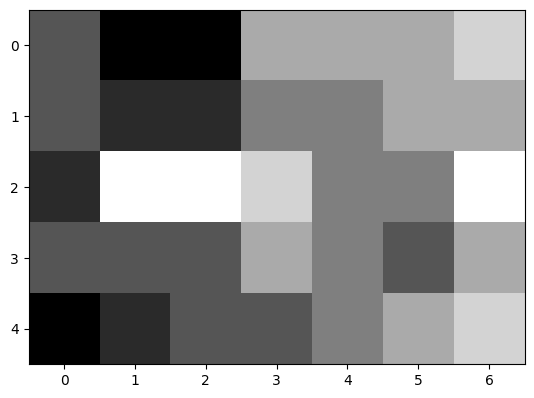

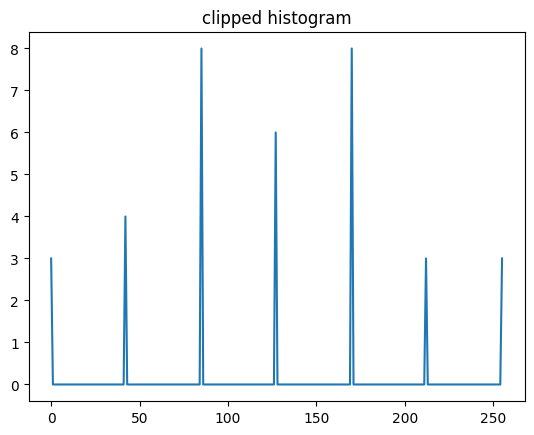

In [30]:
#dont change this cell
min_value = 139
max_value = 145
plt.imshow(clip_hist(image1,min_value, max_value),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(clip_hist(image1,min_value, max_value)))
plt.title('clipped histogram')

# part 2



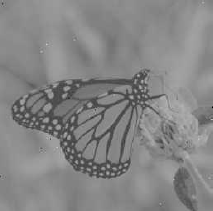

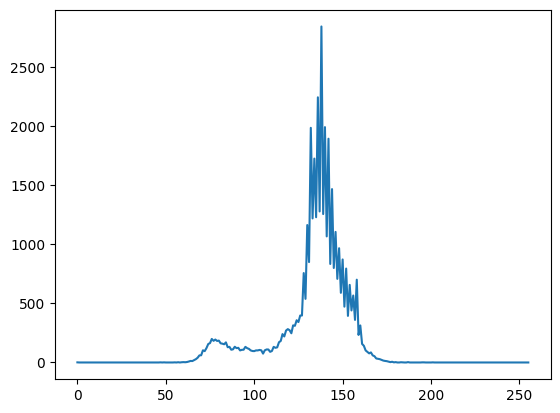

In [24]:
# first read the image and show it.(image2)
from google.colab.patches import cv2_imshow
image2 = cv2.imread('image2.png' , cv2.IMREAD_GRAYSCALE)
cv2_imshow(image2)
plt.plot(calc_hist(image2))

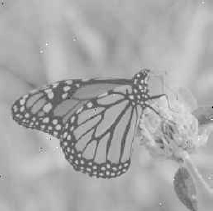

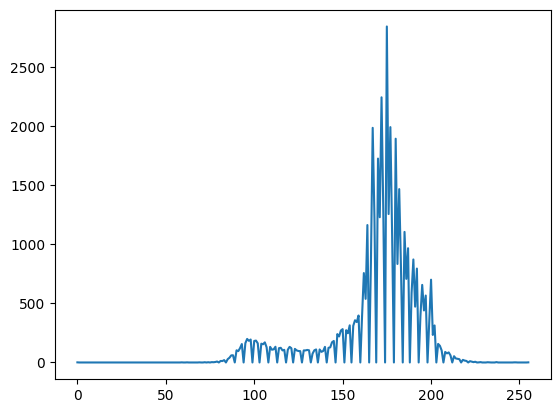

In [31]:
#use stretch_hist function to improve quality of the image and show it
cv2_imshow(stretch_hist(image2))
plt.plot(calc_hist(stretch_hist(image2)))

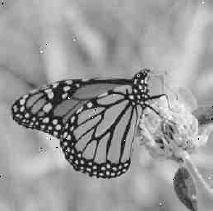

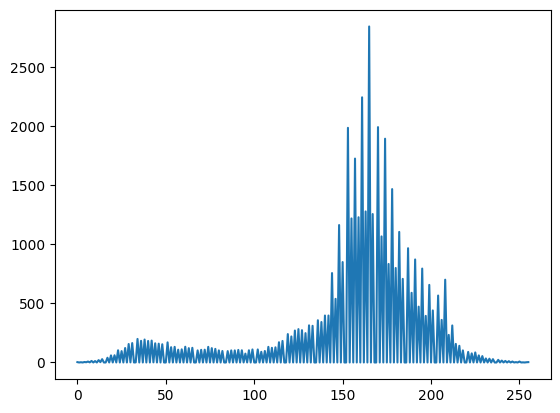

In [38]:
#use clip_hist function to improve qality of the image and show it
cv2_imshow(clip_hist(image2 , 60 , 180))
plt.plot(calc_hist(clip_hist(image2 , 60 , 180)))